In [1]:
import rasterio
from rasterio.plot import show
from rasterio.windows import Window

from matplotlib import pyplot

import pathlib

import os
import fiona
import rasterio
from rasterio.plot import show
from rasterio.plot import show_hist
from rasterio.mask import mask
from shapely.geometry import box, Polygon
import geopandas as gpd
import pandas as pd
from fiona.crs import from_epsg
import pycrs
from matplotlib import pyplot
import random

In [2]:
path_data   = pathlib.Path('C:/Users/Scott/Documents/Repos/failingroof/data')

In [3]:
path_data

WindowsPath('C:/Users/Scott/Documents/Repos/failingroof/data')

In [9]:
[x for x in os.listdir(path_data)] 

['201402_baltimore_city_md_6in_sp_cnir_images.txt',
 '2639477_45290102',
 '2639477_45290102.zip',
 '2639478_45290104',
 '2639478_45290104.zip',
 '3492514_45088301',
 '3492514_45088301.zip',
 '3492520_45098103',
 '3492520_45098103.zip',
 '3492548_45290904',
 '3492548_45290904.zip']

In [6]:
d

<generator object walk at 0x00000186C902C048>

In [314]:
path_data   = pathlib.Path('C:/Users/Scott/Documents/Repos/failingroof/data/3492548_45290904/MD/2014/201402_baltimore_city_md_6in_sp_cnir/vol001')
path_data_1 = pathlib.Path('C:/Users/Scott/Documents/Repos/failingroof/data/3492520_45098103/MD/2014/201402_baltimore_city_md_6in_sp_cnir/vol001')
path_data_2 = pathlib.Path('C:/Users/Scott/Documents/Repos/failingroof/data/3492514_45088301/MD/2014/201402_baltimore_city_md_6in_sp_cnir/vol001')

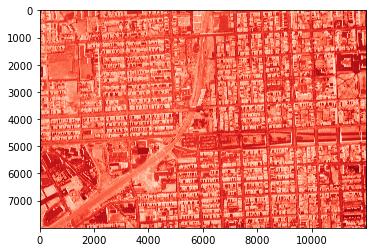

In [313]:
#fp = r'GeoTiff_Image.tif'
src = rasterio.open(path_data_1/'45098103.tif')
pyplot.imshow(src.read(1), cmap='Reds')
#pyplot.imshow(src.read(2), cmap='Greens')
#pyplot.imshow(src.read(3), cmap='Blues')
#show(img, 2)

In [ ]:
rasterio.open()

(408, 408)


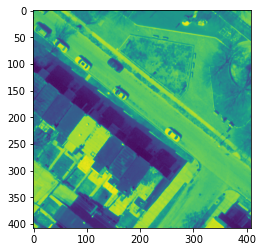

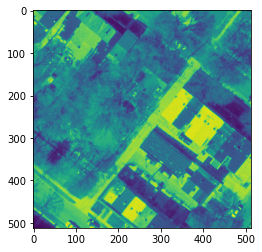

<AxesSubplot:>

In [72]:
with rasterio.open(path_data/'45290904.tif') as src:
    w = src.read(1, window=Window(0, 0, 408, 408)) # 
    x = src.read(1, window=Window(512, 0, 512, 512)) # (x1, y1, x2, y2), down is positive, right is positive
    
print(w.shape)
#print(w.profile)
show(w)
show(x)


In [ ]:
photo_size = 

In [67]:
with rasterio.open(path_data/'45290904.tif') as src:
    print(src.profile)

{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': None, 'width': 12000, 'height': 8000, 'count': 4, 'crs': None, 'transform': Affine(0.5, 0.0, 1426000.0,
       0.0, -0.5, 603000.0), 'tiled': False, 'interleave': 'pixel'}


In [68]:
with rasterio.open(path_data/'45290904.tif') as src:
    print(src.profile['width'])
    print(src.profile['width']//640)

12000
18


In [70]:
640*18

11520

In [88]:
with rasterio.open(path_data/'45290904.tif') as src:
    print(src.profile['height'])
    print(src.profile['height']//640)

8000
12


In [71]:
640*12

7680

In [49]:
18*12

216

In [84]:
# 0, 0, 408, 408

maxy = 0 # northern lat
miny = 408 # southern lat
maxx = 408 # eastern long
minx = 0 # western long

bbox = box(minx, miny, maxx, maxy)

In [316]:
#photo_id = '45290904.tif'
#photo_number = '45290904'

#photo_id = '45098103.tif'
#photo_number = '45098103'

photo_id = '45088301.tif'
photo_number = '45088301'


dataset = rasterio.open(path_data_2/photo_id)

In [317]:
dataset.bounds


BoundingBox(left=1408000.0, bottom=587000.0, right=1414000.0, top=591000.0)

In [318]:
dataset.width

12000

In [319]:
dataset.height

8000

In [320]:
unit_width = dataset.bounds.right - dataset.bounds.left
unit_height = dataset.bounds.top - dataset.bounds.bottom


In [321]:
total_columns = int(unit_width // photo_width)
total_columns

23

In [322]:
total_rows = int(unit_height // photo_height)
total_rows

15

In [323]:
dataset.crs

In [324]:
#data = rasterio.open(path_data/'45290904.tif')

In [325]:
photo_width = 256
photo_height = 256

In [326]:
for row in range(0, total_rows):
    for column in range(0,total_columns):
        maxy = dataset.bounds.top - (row*photo_height) # northern lat
        miny = maxy - photo_height  # southern lat
        maxx = dataset.bounds.right - (column*photo_width)  # eastern long
        minx = maxx - photo_width # western long

        bbox = box(minx, miny, maxx, maxy)

        out_img, out_transform = mask(dataset, [bbox], crop=True)
        out_meta = data.meta.copy()

        out_meta.update({"driver": "JPEG",
                             "height": out_img.shape[1],
                             "width": out_img.shape[2],
                             "count": 3,
                             "transform": out_transform})

        #filename bits
        photo_dimensions = str(photo_width*2)+'_'+str(photo_height*2) # each unit is 2 pixels

        fullFileName = 'image_chips/'+ photo_number+'_'+str(column)+'_'+str(row)+'_'+photo_dimensions+'.jpeg'
        print(fullFileName)

        with rasterio.open(fullFileName, "w", **out_meta) as dest:
            dest.write(out_img[:3])

image_chips/45088301_0_0_512_512.jpeg
image_chips/45088301_1_0_512_512.jpeg
image_chips/45088301_2_0_512_512.jpeg
image_chips/45088301_3_0_512_512.jpeg
image_chips/45088301_4_0_512_512.jpeg
image_chips/45088301_5_0_512_512.jpeg
image_chips/45088301_6_0_512_512.jpeg
image_chips/45088301_7_0_512_512.jpeg
image_chips/45088301_8_0_512_512.jpeg
image_chips/45088301_9_0_512_512.jpeg
image_chips/45088301_10_0_512_512.jpeg
image_chips/45088301_11_0_512_512.jpeg
image_chips/45088301_12_0_512_512.jpeg
image_chips/45088301_13_0_512_512.jpeg
image_chips/45088301_14_0_512_512.jpeg
image_chips/45088301_15_0_512_512.jpeg
image_chips/45088301_16_0_512_512.jpeg
image_chips/45088301_17_0_512_512.jpeg
image_chips/45088301_18_0_512_512.jpeg
image_chips/45088301_19_0_512_512.jpeg
image_chips/45088301_20_0_512_512.jpeg
image_chips/45088301_21_0_512_512.jpeg
image_chips/45088301_22_0_512_512.jpeg
image_chips/45088301_0_1_512_512.jpeg
image_chips/45088301_1_1_512_512.jpeg
image_chips/45088301_2_1_512_512.jpeg

image_chips/45088301_8_9_512_512.jpeg
image_chips/45088301_9_9_512_512.jpeg
image_chips/45088301_10_9_512_512.jpeg
image_chips/45088301_11_9_512_512.jpeg
image_chips/45088301_12_9_512_512.jpeg
image_chips/45088301_13_9_512_512.jpeg
image_chips/45088301_14_9_512_512.jpeg
image_chips/45088301_15_9_512_512.jpeg
image_chips/45088301_16_9_512_512.jpeg
image_chips/45088301_17_9_512_512.jpeg
image_chips/45088301_18_9_512_512.jpeg
image_chips/45088301_19_9_512_512.jpeg
image_chips/45088301_20_9_512_512.jpeg
image_chips/45088301_21_9_512_512.jpeg
image_chips/45088301_22_9_512_512.jpeg
image_chips/45088301_0_10_512_512.jpeg
image_chips/45088301_1_10_512_512.jpeg
image_chips/45088301_2_10_512_512.jpeg
image_chips/45088301_3_10_512_512.jpeg
image_chips/45088301_4_10_512_512.jpeg
image_chips/45088301_5_10_512_512.jpeg
image_chips/45088301_6_10_512_512.jpeg
image_chips/45088301_7_10_512_512.jpeg
image_chips/45088301_8_10_512_512.jpeg
image_chips/45088301_9_10_512_512.jpeg
image_chips/45088301_10_10_

In [327]:
dataset.bounds.top

591000.0

In [328]:
maxy

587416.0

In [329]:
dataset.bounds.bottom

587000.0

In [330]:
maxy, miny

(587416.0, 587160.0)

In [331]:
maxx, minx

(1408368.0, 1408112.0)